In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_ = pd.read_csv("jobs_in_data.csv")
df = df_.copy()

In [4]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [5]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023.0,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023.0,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,Senior,Full-time,In-person,United States,M
2,2023.0,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,Senior,Full-time,In-person,United States,M
3,2023.0,Data Scientist,Data Science and Research,USD,212000.0,212000.0,United States,Senior,Full-time,In-person,United States,M
4,2023.0,Data Scientist,NaN,USD,93300.0,93300.0,United States,Senior,Full-time,In-person,United States,M


In [6]:
df.shape

(9355, 12)

In [7]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9094 non-null   float64
 1   job_title           9086 non-null   object 
 2   job_category        9079 non-null   object 
 3   salary_currency     9094 non-null   object 
 4   salary              9060 non-null   float64
 5   salary_in_usd       9068 non-null   float64
 6   employee_residence  9091 non-null   object 
 7   experience_level    9062 non-null   object 
 8   employment_type     9089 non-null   object 
 9   work_setting        9078 non-null   object 
 10  company_location    9080 non-null   object 
 11  company_size        9060 non-null   object 
dtypes: float64(3), object(9)
memory usage: 877.2+ KB


# Kategorik - Sayısal 

In [9]:
categorical = []
numerical = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical.append(col)
    else:
        numerical.append(col)

In [10]:
categorical, numerical

(['job_title',
  'job_category',
  'salary_currency',
  'employee_residence',
  'experience_level',
  'employment_type',
  'work_setting',
  'company_location',
  'company_size'],
 ['work_year', 'salary', 'salary_in_usd'])

In [11]:
for col in df.columns:
    if col in categorical:
        df[col] = pd.Categorical(df[col])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           9094 non-null   float64 
 1   job_title           9086 non-null   category
 2   job_category        9079 non-null   category
 3   salary_currency     9094 non-null   category
 4   salary              9060 non-null   float64 
 5   salary_in_usd       9068 non-null   float64 
 6   employee_residence  9091 non-null   category
 7   experience_level    9062 non-null   category
 8   employment_type     9089 non-null   category
 9   work_setting        9078 non-null   category
 10  company_location    9080 non-null   category
 11  company_size        9060 non-null   category
dtypes: category(9), float64(3)
memory usage: 313.4 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,9094.0,2022.760062,0.520180,2020.0,2023.0,2023.0,2023.0,2023.0
salary,9060.0,149971.803201,63736.433969,14000.0,105200.0,143805.0,187000.0,450000.0
salary_in_usd,9068.0,150281.393361,63154.534781,15000.0,105700.0,143225.0,186300.0,450000.0


# Eksik Veri Analizi

In [14]:
df.isna().sum() / df.shape[0] * 100

work_year             2.789952
job_title             2.875468
job_category          2.950294
salary_currency       2.789952
salary                3.153394
salary_in_usd         3.067878
employee_residence    2.822020
experience_level      3.132015
employment_type       2.843399
work_setting          2.960983
company_location      2.939604
company_size          3.153394
dtype: float64

In [15]:
# Veri setinde en az bir gözlemi eksik olan kayıtlar.
df[df.isnull().any(axis = 1)][:5]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
4,2023.0,Data Scientist,NaN,USD,93300.0,93300.0,United States,Senior,Full-time,In-person,United States,M
6,2023.0,Data Scientist,Data Science and Research,USD,NaN,100000.0,United States,Senior,Full-time,Remote,United States,M
9,2023.0,Data Engineer,Data Engineering,USD,210000.0,210000.0,United States,Executive,Full-time,NaN,United States,M
11,2023.0,Machine Learning Engineer,Machine Learning and AI,USD,224400.0,NaN,NaN,Senior,Full-time,In-person,United States,M
20,NaN,Analytics Engineer,Leadership and Management,USD,120000.0,120000.0,United States,Mid-level,Full-time,In-person,United States,M


In [16]:
# pip install missingno

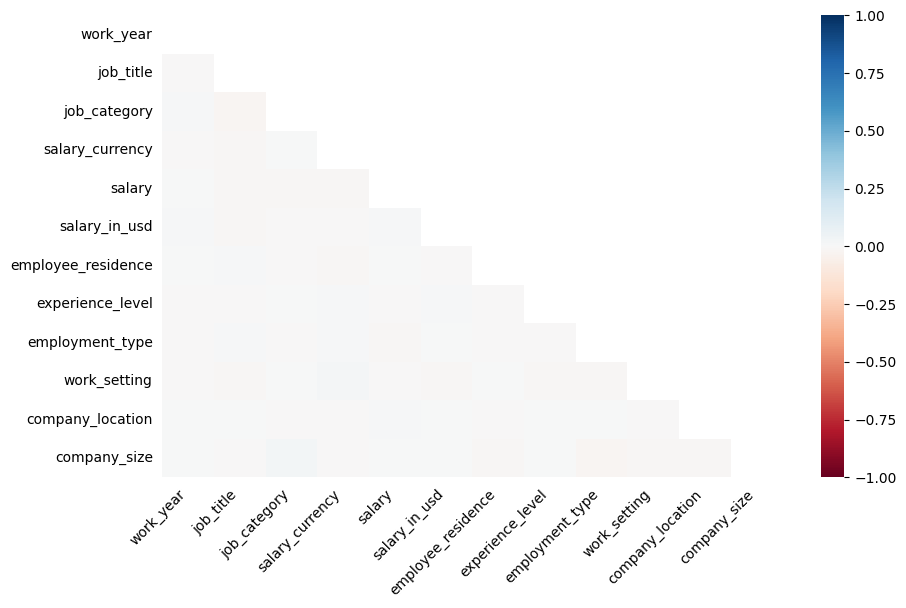

In [17]:
# Boş değerlerin korelasyonu 
import missingno as msno
msno.heatmap(df = df,
            figsize = (10,6),
            fontsize = 10)
plt.show()

In [18]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek.

df.dropna(how = "all")

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023.0,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023.0,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,Senior,Full-time,In-person,United States,M
2,2023.0,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,Senior,Full-time,In-person,United States,M
3,2023.0,Data Scientist,Data Science and Research,USD,212000.0,212000.0,United States,Senior,Full-time,In-person,United States,M
4,2023.0,Data Scientist,NaN,USD,93300.0,93300.0,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021.0,Data Specialist,Data Management and Strategy,USD,165000.0,165000.0,United States,Senior,Full-time,Remote,United States,L
9351,2020.0,Data Scientist,Data Science and Research,USD,412000.0,412000.0,United States,Senior,Full-time,Remote,United States,L
9352,2021.0,Principal Data Scientist,Data Science and Research,USD,151000.0,151000.0,United States,Mid-level,Full-time,Remote,United States,L
9353,2020.0,Data Scientist,Data Science and Research,USD,105000.0,105000.0,United States,Entry-level,Full-time,Remote,United States,S


# Eksik verilerin doldurulması

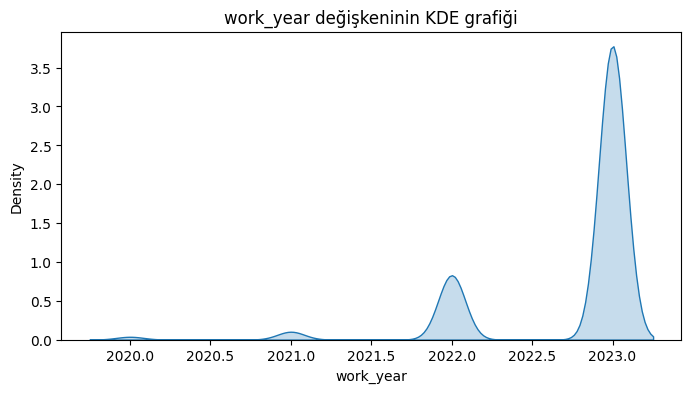

work_year çarpıklık değeri: -2.43
→ work_year çarpık dağılıyor, **median** ile doldurulmalı.



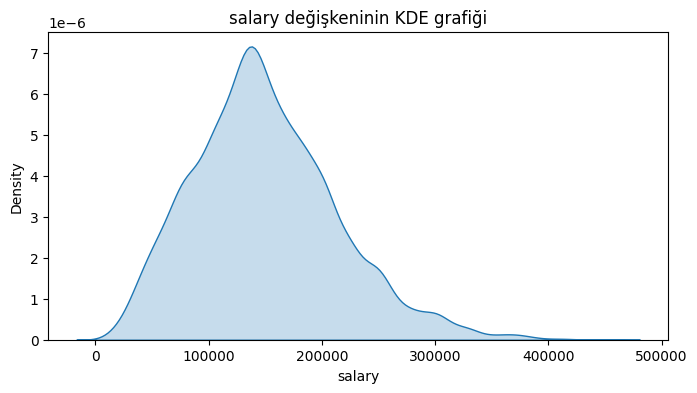

salary çarpıklık değeri: 0.59
→ salary simetrik dağılıyor, **mean** ile doldurulmalı.



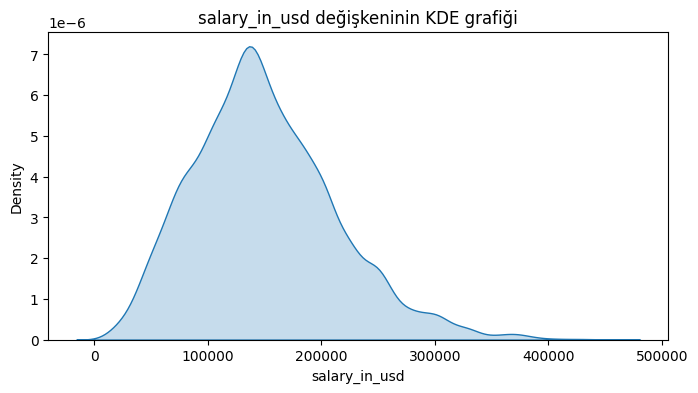

salary_in_usd çarpıklık değeri: 0.62
→ salary_in_usd simetrik dağılıyor, **mean** ile doldurulmalı.



In [19]:
for col in numerical:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"{col} değişkeninin KDE grafiği")
    plt.show()

    skewness = df[col].skew()
    print(f"{col} çarpıklık değeri: {skewness:.2f}")

    if abs(skewness) > 1:
        print(f"→ {col} çarpık dağılıyor, **median** ile doldurulmalı.\n")
    else:
        print(f"→ {col} simetrik dağılıyor, **mean** ile doldurulmalı.\n")

In [20]:
numerical

['work_year', 'salary', 'salary_in_usd']

In [21]:
df['salary'].fillna(
    value=df.groupby('job_title')['salary'].transform('mean'),
    inplace=True)

df["salary_in_usd"] = df["salary_in_usd"].fillna(df["salary_in_usd"].mean())
df["work_year"] = df["work_year"].fillna(df["work_year"].median())

In [22]:
df.isnull().sum()

work_year               0
job_title             269
job_category          276
salary_currency       261
salary                  6
salary_in_usd           0
employee_residence    264
experience_level      293
employment_type       266
work_setting          277
company_location      275
company_size          295
dtype: int64

In [23]:
df[df["salary"].isnull()]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3978,2023.0,NaN,Data Engineering,USD,NaN,157250.0,United States,Senior,Full-time,Remote,United States,M
4896,2023.0,NaN,Machine Learning and AI,USD,NaN,180000.0,United States,Mid-level,Contract,Remote,United States,S
6108,2023.0,NaN,Data Science and Research,USD,NaN,154000.0,United States,Senior,Full-time,In-person,United States,M
7052,2023.0,NaN,Machine Learning and AI,USD,NaN,150000.0,United States,Senior,Full-time,In-person,United States,M
7933,2022.0,NaN,Data Engineering,USD,NaN,160000.0,United States,NaN,Full-time,In-person,United States,M
8369,2022.0,NaN,Data Engineering,USD,NaN,187200.0,United States,Executive,Full-time,Remote,United States,M


In [24]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023.0,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023.0,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,Senior,Full-time,In-person,United States,M
2,2023.0,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,Senior,Full-time,In-person,United States,M
3,2023.0,Data Scientist,Data Science and Research,USD,212000.0,212000.0,United States,Senior,Full-time,In-person,United States,M
4,2023.0,Data Scientist,NaN,USD,93300.0,93300.0,United States,Senior,Full-time,In-person,United States,M


# Kategorik Değişkenlere Bakılması

In [25]:
job_cat = df.groupby(by = ["job_category", "experience_level"])["salary_in_usd"].mean().round(2).to_frame().sort_values(by = "salary_in_usd", ascending = False)[:8]

In [26]:
job_cat.reset_index()

,job_category,experience_level,salary_in_usd
0,Machine Learning and AI,Executive,208719.67
1,Data Science and Research,Executive,200768.99
2,Machine Learning and AI,Senior,189930.28
3,Leadership and Management,Executive,188478.50
4,Data Engineering,Executive,186959.57
5,BI and Visualization,Executive,181913.57
6,Data Science and Research,Senior,173968.28
7,Data Architecture and Modeling,Executive,167500.00


In [27]:
def get_location_job_counts(df, location):
    """
    Belirli bir lokasyondaki iş kategorilerinin sayılarını getirir
    
    Parameters:
    df (DataFrame): Veri çerçevesi
    location (str): Şirket lokasyonu (örn: "Australia")
    
    Returns:
    DataFrame: Lokasyona göre filtrelenmiş iş kategorisi sayıları
    """
    df_location = (df.groupby(by="company_location")["job_category"]
                   .value_counts()
                   .reset_index(name='count')
                   .sort_values(by="count", ascending=False))
    
    df_location_filtered = df_location[df_location['company_location'] == location]
    return df_location_filtered

# Kullanım
df_location = get_location_job_counts(df, "Australia")
df_location

,company_location,job_category,count
50,Australia,Machine Learning and AI,13
51,Australia,Data Analysis,6
52,Australia,Data Science and Research,3
53,Australia,Data Engineering,2
54,Australia,Data Architecture and Modeling,0
55,Australia,Cloud and Database,0
56,Australia,Leadership and Management,0
57,Australia,Data Management and Strategy,0
58,Australia,Data Quality and Operations,0
59,Australia,BI and Visualization,0


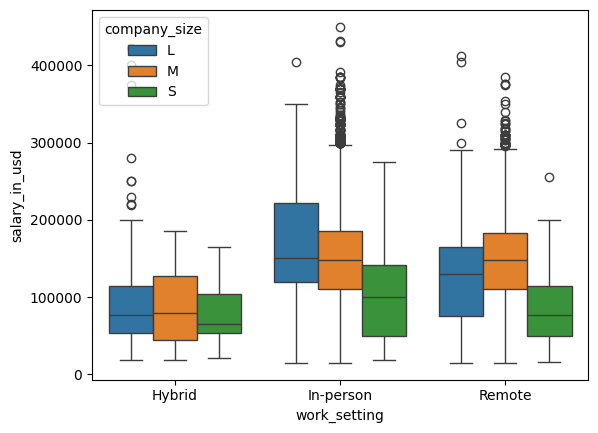

In [28]:
sns.boxplot(data = df,
           x = "work_setting",
           y = "salary_in_usd",
           hue = "company_size")
plt.show()

# Sayısal Değişkenlerin kolerasyonu

In [29]:
num_df = df.select_dtypes(include=['number'])
corr = num_df.corr()

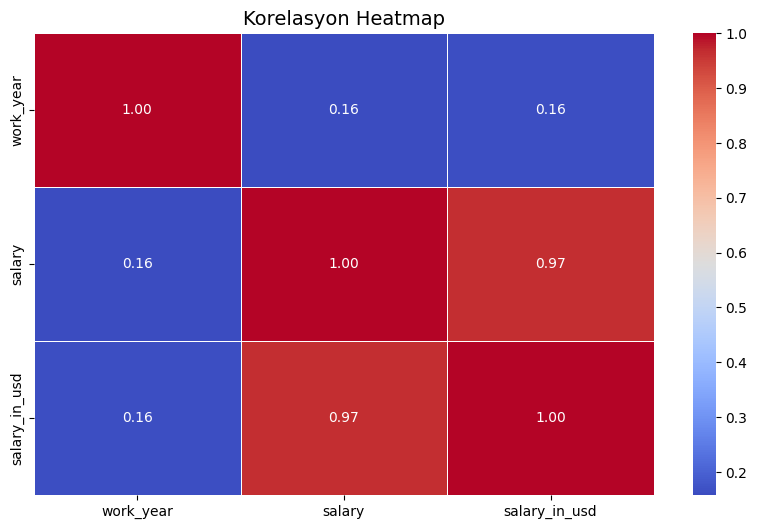

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Heatmap", fontsize=14)
plt.show()


# Outlier'ları max ve min değere baskılama

In [31]:
df_salary_in_usd = df['salary_in_usd']
df_salary_in_usd

0        95012.0
1       186000.0
2        81800.0
3       212000.0
4        93300.0
          ...   
9350    165000.0
9351    412000.0
9352    151000.0
9353    105000.0
9354    100000.0
Name: salary_in_usd, Length: 9355, dtype: float64

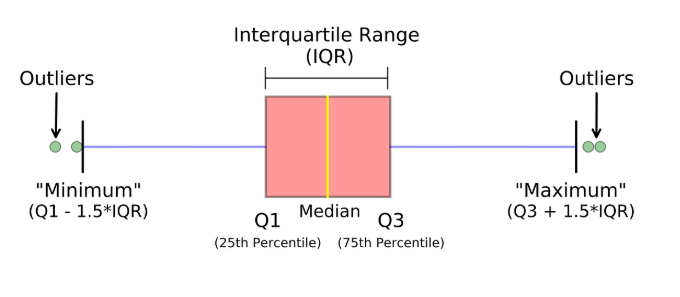

In [32]:
# Quantile değerlerin belirlenmesi.
Q1 = df_salary_in_usd.quantile(0.25)
Q3 = df_salary_in_usd.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

107125.0
185900.0
78775.0


In [33]:
df.loc[df_salary_in_usd > upper_fence, "salary_in_usd"] = upper_fence

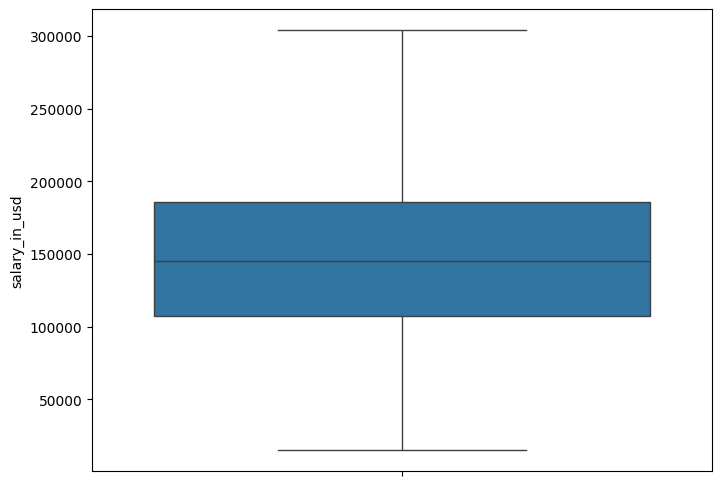

In [34]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["salary_in_usd"],
            orient = "v");

## Feature Engineering

In [35]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023.0,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023.0,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,Senior,Full-time,In-person,United States,M
2,2023.0,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,Senior,Full-time,In-person,United States,M
3,2023.0,Data Scientist,Data Science and Research,USD,212000.0,212000.0,United States,Senior,Full-time,In-person,United States,M
4,2023.0,Data Scientist,NaN,USD,93300.0,93300.0,United States,Senior,Full-time,In-person,United States,M


In [36]:
# USD bazında maaş tutarlarına göre maaş segmentasyonu oluşturabiliriz.
def salary_range(salary):
    if salary < 80000:
        return 'Low'
    elif 80000 <= salary <= 150000:
        return 'Medium'
    else:
        return 'High'

df['salary_range'] = df['salary_in_usd'].apply(salary_range)

df.head(3)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_range
0,2023.0,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L,Medium
1,2023.0,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,Senior,Full-time,In-person,United States,M,High
2,2023.0,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,Senior,Full-time,In-person,United States,M,Medium


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           9355 non-null   float64 
 1   job_title           9086 non-null   category
 2   job_category        9079 non-null   category
 3   salary_currency     9094 non-null   category
 4   salary              9349 non-null   float64 
 5   salary_in_usd       9355 non-null   float64 
 6   employee_residence  9091 non-null   category
 7   experience_level    9062 non-null   category
 8   employment_type     9089 non-null   category
 9   work_setting        9078 non-null   category
 10  company_location    9080 non-null   category
 11  company_size        9060 non-null   category
 12  salary_range        9355 non-null   object  
dtypes: category(9), float64(3), object(1)
memory usage: 386.4+ KB


In [38]:
# Çalışanın kendi ülkesinde mi yoksa başka ülkede mi çalıştığının bilgisini çıkarabiliriz.
df['is_international'] = df.apply(lambda row: True if row['employee_residence'] != row['company_location'] else False, axis=1)

df[df['is_international'] == True]


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_range,is_international
11,2023.0,Machine Learning Engineer,Machine Learning and AI,USD,224400.000000,150281.393361,NaN,Senior,Full-time,In-person,United States,M,High,True
23,2023.0,Data Analyst,Data Analysis,USD,155000.000000,155000.000000,United States,Mid-level,Full-time,In-person,NaN,M,High,True
67,2023.0,Data Engineer,Data Engineering,GBP,146251.904394,71363.000000,United Kingdom,Senior,Full-time,In-person,NaN,M,Low,True
96,2023.0,Data Engineer,Data Engineering,USD,133300.000000,150281.393361,United States,Senior,Full-time,In-person,NaN,M,High,True
120,2023.0,Data Scientist,Data Science and Research,USD,131000.000000,131000.000000,United States,Mid-level,Full-time,In-person,NaN,M,Medium,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,2020.0,Computer Vision Engineer,Machine Learning and AI,USD,177881.818182,60000.000000,Russia,Senior,Freelance,Remote,United States,S,Low,True
9334,2020.0,Data Scientist,Data Science and Research,EUR,55000.000000,62726.000000,France,Mid-level,Full-time,Hybrid,Luxembourg,S,Low,True
9344,2020.0,Data Engineer,Data Engineering,USD,130800.000000,130800.000000,Spain,Mid-level,Full-time,Remote,United States,M,Medium,True
9347,2021.0,Data Scientist,Data Science and Research,SGD,160000.000000,119059.000000,Singapore,Mid-level,Full-time,Remote,Israel,M,Medium,True
